In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (15.0, 6.0)
plt.rcParams['font.size'] = 16

In [22]:
def force(data,n):
    result = np.zeros(2)
    x, y = data[:,0], data[:,1]
    for i in range(N):
        result[0] += V0*(x[i]-x[n])
        result[1] += V0*(y[i]-y[n])
        if i!=n:
            result[0] -= 2*(x[i]-x[n])/((x[i]-x[n])**2+(y[i]-y[n])**2)**2 
            result[1] -= 2*(y[i]-y[n])/((x[i]-x[n])**2+(y[i]-y[n])**2)**2 
    return result

def do_step(data,i,dt,n):
    F = force(data[:,i-1],n)
#    x = 2*data[n,i-1,0] - data[n,i-2,0] + F[0]*np.square(dt)
#    y = 2*data[n,i-1,1] - data[n,i-2,1] + F[1]*np.square(dt)
    x = data[n,i-1,0] + 0.99*(data[n,i-1,0] - data[n,i-2,0]) + F[0]*np.square(dt)
    y = data[n,i-1,1] + 0.99*(data[n,i-1,1] - data[n,i-2,1]) + F[1]*np.square(dt)
    return x,y

def main(dt, N):
    trac = np.zeros((N, Schritte,2))
    x_start = np.random.randn(N,2)
    trac[:,0] = x_start
    trac[:,1] = np.copy(trac[:,0])

    for i in range(2,Schritte):
        for n in range(N):
            trac[n,i] = do_step(trac,i,dt,n)
    return trac
V0=1
N = 30
Schritte = 10000
dt = 0.01
trac = main(dt,N)

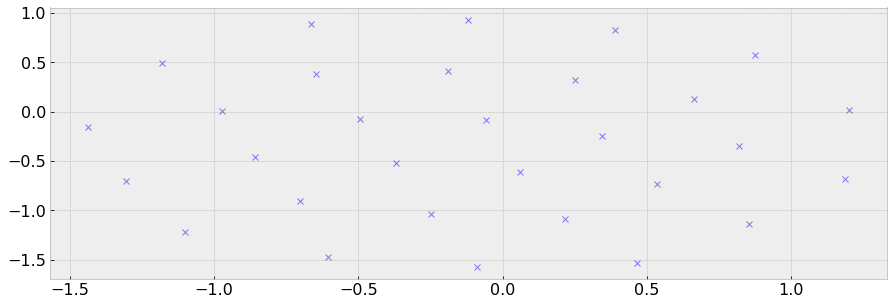

In [23]:
if 1:
    for n in range(N):
        plt.plot(trac[n,-1,0],trac[n,-1,1],"x",alpha=0.5, c = "b")
    plt.show()

if 0:
    for n in range(N):
        plt.plot(trac[n,0,0],trac[n,0,1],"x",alpha=0.5, c = "C%i"%n)
        plt.plot(trac[n,-1,0],trac[n,-1,1],"o", c = "C%i"%n)
        plt.plot(trac[n,-100,0],trac[n,-100,1],"X", c = "C%i"%n)
    plt.show()

if 0:
    for n in range(N):
        for t in range(Schritte):
            if t%100==1:
                plt.plot(trac[n,t,0],trac[n,t,1],"o", alpha = t/(Schritte/4), c = "C%i"%n)
    plt.show()
    
    if 0:
        for n in range(N):
            for t in range(Schritte):
                plt.plot(trac[n,t,0],trac[n,t,1],"o", alpha = t/(Schritte), c = "C%i"%n)
        plt.show()


8.2. Directed percolation

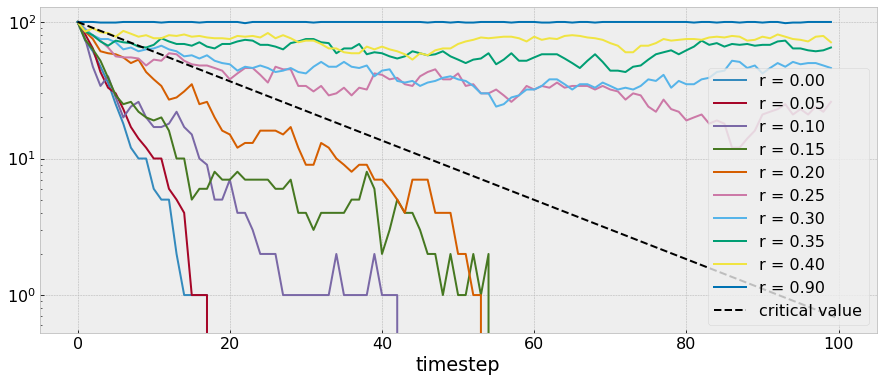

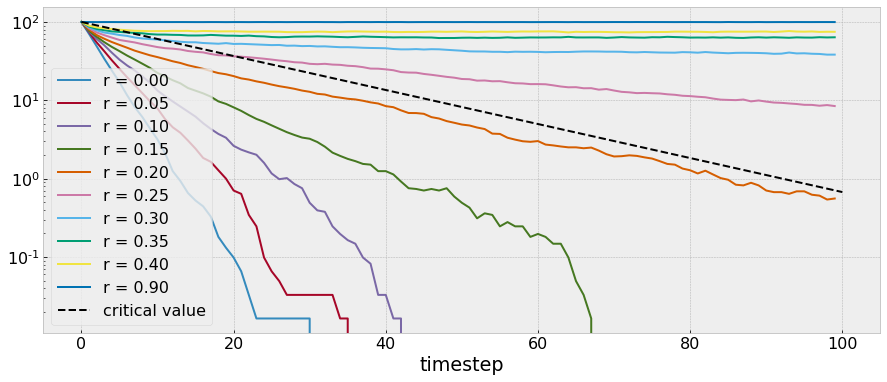

In [115]:
def perolation(r,p):
    end_time = 100
    width = 100
    
    lattice = np.full((end_time,width),np.nan)
    lattice[0,:] = 1
    for ct in range(1,end_time):
        for pos in range(width):
            q = 1-(
                1-r*lattice[ct-1,(pos-1)%width])*(
                1-p*lattice[ct-1,pos])*(
                1-r*lattice[ct-1,(pos+1)%width])
         
            if np.random.rand() < q:
                lattice[ct, pos] = 1
            else:
                lattice[ct, pos] = 0

    return lattice

def criti():
    x = np.linspace(0,100, 100)
    plt.plot(x, 100/np.exp(x/20), "--k", label= "critical value")

for r in (0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.9 ):
    matrix = perolation(r,0.7)
#    plt.imshow(matrix[:5,:])
#    plt.show()
    plt.plot(np.sum(matrix,axis=1), label = "r = %.2f"%r), plt.xlabel("timestep")
criti()
plt.legend(), plt.semilogy(), plt.show()

if 1: # mehr statistik
    for r in (0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.9 ):
        matrix = perolation(r,0.7)
        for i in range(60):
            matrix += perolation(r,0.7)
        matrix /= i+2
        plt.plot(np.sum(matrix,axis=1), label = "r = %.2f"%r), plt.xlabel("timestep")
    criti()
    plt.legend(), plt.semilogy(), plt.show()